<a href="https://colab.research.google.com/github/torrhen/image_processing/blob/main/noise_reduction_with_image_addition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

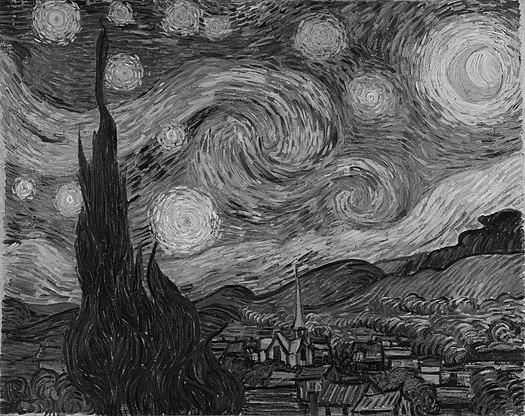

In [5]:
import cv2 as cv
import numpy as np
import requests
from google.colab.patches import cv2_imshow

# display greyscale image
image = cv.imread("night.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(image)

In [6]:
# create 100 copies of image
images = np.zeros((5, 416, 525))
for i in range(5):
  images[i] = image
# uncorrelated and standard normal noise added to every image
noise = np.random.randn(5, 416, 525)
images_noise = images + noise

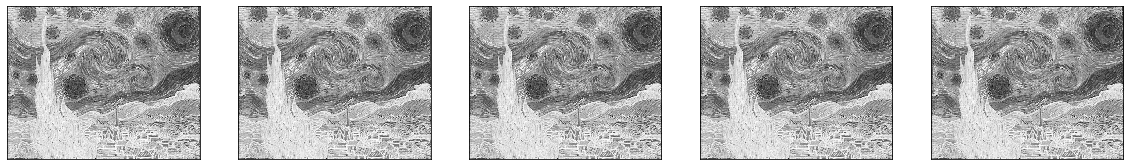

In [7]:
import matplotlib.pyplot as plt

# setup plot
fig, ax = plt.subplots(nrows=1,
                       ncols=5,
                       figsize=(20, 20), # 8 x 8 digit images
                       subplot_kw={'xticks':[], 'yticks':[]}
                       )

# plot all noisey images
for i, ax in enumerate(ax.flat):
  ax.imshow(images_noise[i], cmap='binary', interpolation='nearest')

Given an input image $f(x,y)$, added uncorrelated noise can be reduced by adding all the noisey images together, ${g}_{i}(x, y)$, and averaging each pixel value.

$\bar{g}(x, y) = \frac{1}{k}\sum\limits_{i=1}^k{g}_{i}(x, y)$

The expected values of the averaged noisey images will be a close approximation of the original input image.

$\mathbf{E}[\bar{g}(x, y)] \approx f(x, y)$

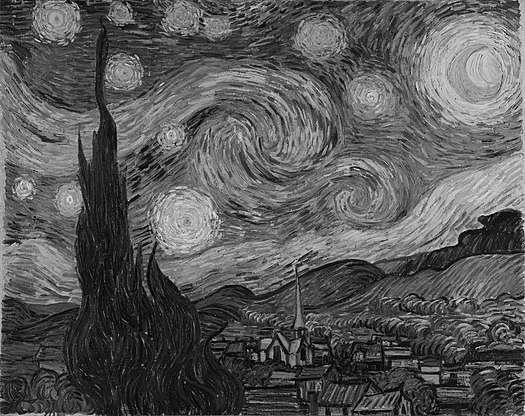

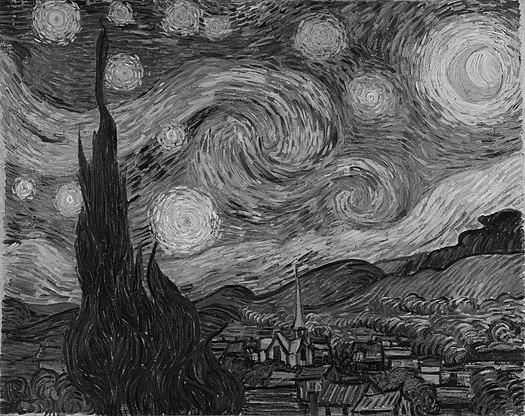

In [8]:
# reduce noise using image addition and averaging
avg_image = np.mean(images_noise, axis=0)
cv2_imshow(avg_image)
# compare with original image
cv2_imshow(image)